## 聚类

主流算法如下所示：
- K-means: 入门级间接算法
- 高斯混合模型：以概率模型为每条数据给出多个可能聚类分组的可能性估计
- DBSCAN：可以在有噪音的数据空间中发现凹数据分组的密度聚类算法
- BIRCH：以树的形式逐级表达组间亲缘性的层次聚类算法

距离度量：
- 欧几里得距离
- 闵可夫斯基距离
- 曼哈顿距离
- 余弦距离

聚类评估：
- Jaccard 系数
- DB指数

### K-means

数据集使用鸢尾花，该数据集包含了4个属性：
- Sepal.Length（花萼长度），单位是cm;
- Sepal.Width（花萼宽度），单位是cm;
- Petal.Length（花瓣长度），单位是cm;
- Petal.Width（花瓣宽度），单位是cm;

种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。


精度是：0.88%
中心点：
 [[5.84655172 2.73275862 4.3637931 ]
 [5.006      3.428      1.462     ]
 [6.83571429 3.06428571 5.6547619 ]]
收敛值： 69.42973924466338
预测结果： [0 0]
与中心的距离：
 [[0.70691127 3.69981946 1.06360903]
 [3.51936506 4.99446333 3.96326313]]
分组信心： -12.885653983353151


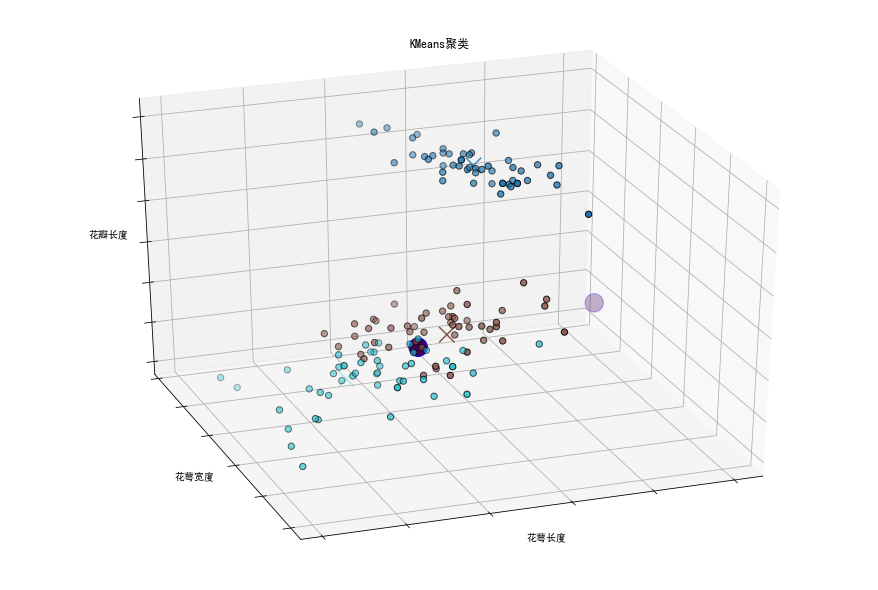

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris() # 输入4个特征，分3类鸢尾花

# 四维特征不好绘图，这里只取前三维
x=iris.data[:,:3]
y=iris.target
kmeans=KMeans(n_clusters=3, random_state=0).fit(x)

fig=plt.figure(figsize=(12,8))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(x[:,0],x[:,1],x[:,2],c=y,cmap=plt.cm.tab10, edgecolor='k',s=40)
ax.set_title('KMeans聚类')
ax.set_xlabel('花萼长度')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('花萼宽度')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('花瓣长度')
ax.w_zaxis.set_ticklabels([])

# 因为标记和kmeans 的标记不一致，所以先调整标记
result=kmeans.labels_
def transform_01(result):
    for index,val in enumerate(result):
        if val==0:
            result[index]=1
        elif val==1:
            result[index]=0

result= transform_01(result)
cluster_centers=kmeans.cluster_centers_
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],c=[1,0,2],marker ='x',cmap=plt.cm.tab10,edgecolor='g',s=240)
    
true_partion_sum=0;
for result,label in zip(kmeans.labels_,y):
    if(result==label):
        true_partion_sum += 1
        
print("精度是：%.2f%%" % (true_partion_sum/len(y)))
print("中心点：\n",kmeans.cluster_centers_)
print("收敛值：",kmeans.inertia_)

# 预测
test_data = [[6,3,5],[3,4,6]]
test_result=kmeans.predict(test_data)
ax.scatter([6,3],[3,4],[5,6],c=test_result,marker ='o', edgecolor='b',s=340)
print("预测结果：",test_result)
print("与中心的距离：\n",kmeans.transform(test_data))
print("分组信心：",kmeans.score(test_data))
plt.show()

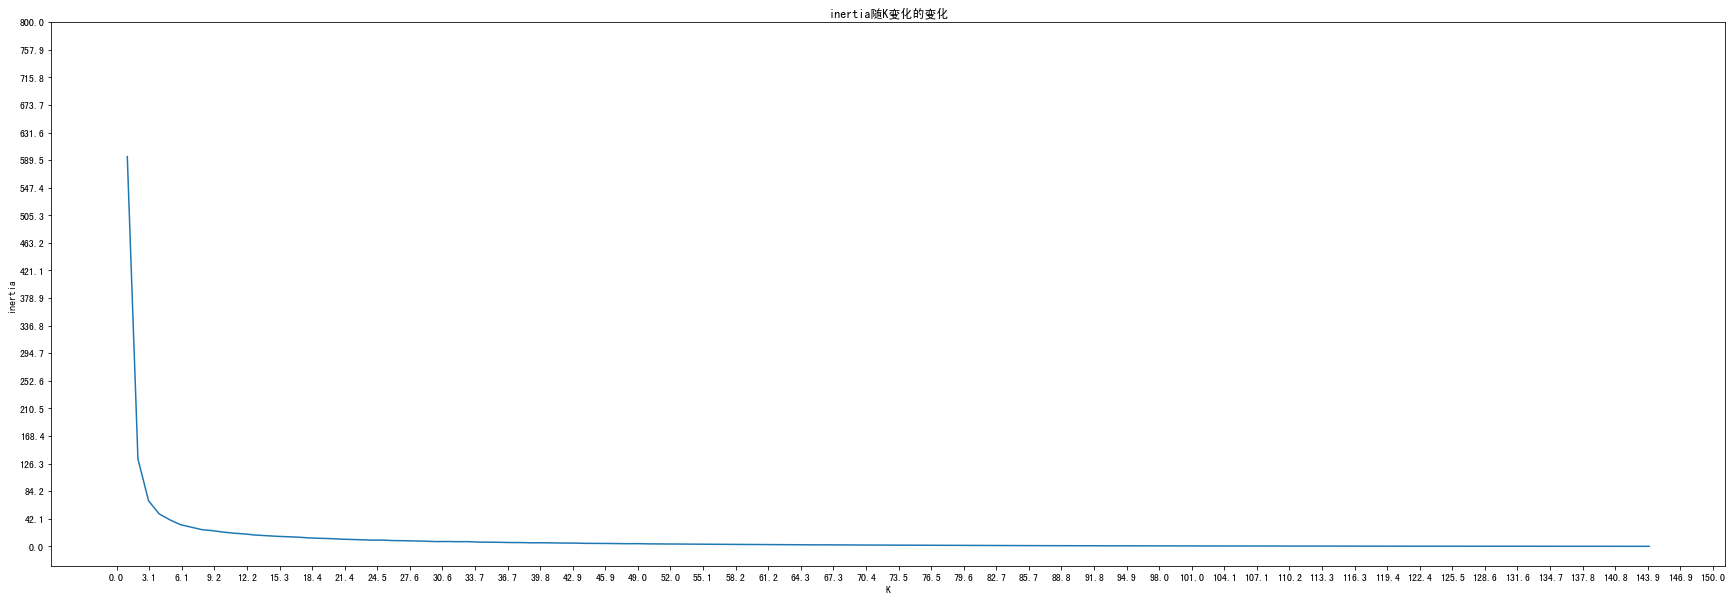

In [2]:
# 如何选择K值？ 
# 数据集中有6个重复点，对实验影响不大
k = [k_e for k_e in range(1, len(y)-5)]
inertia = []
for k_e in k:
    kmeans=KMeans(n_clusters=k_e, random_state=0).fit(x)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(30,10))
plt.plot(k,inertia)
plt.xlabel("K")
plt.xticks(np.linspace(0,len(y) , 50))
plt.ylabel("inertia")
plt.yticks(np.linspace(0,800 , 20))
plt.title("inertia随K变化的变化")
plt.show()

### 高斯混合模型

中心极限定理：大量随机遍历累计分布函数，会逐渐收敛到高斯分布的积累分布函数。

优点：不直接给出分组，而是给出分组的概率

常用EM算法求解，可能陷入局部极值

高斯聚类最重要的求解目标是每个分组的均值和该分组的协方差矩阵。
协方差矩阵分为四种：球面协方差矩阵、对角线协方差矩阵、完全协方差矩阵和绑定协方差矩阵。

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)
gmm = GaussianMixture(n_components=3, covariance_type="diag", max_iter=20, random_state=0)
gmm.fit(X_train)
print(gmm.n_iter_)
print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)
print(gmm.predict(X_test[:1]))
print(gmm.predict_proba(X_test[:1]))

11
[0.3163625 0.3       0.3836375]
[[6.71000646 3.02362505 5.60244906 2.00760984]
 [5.06296296 3.48518519 1.49259259 0.25185185]
 [5.77653246 2.68510009 4.16723162 1.298624  ]]
[[0.36590765 0.11251427 0.39723278 0.07626711]
 [0.11344407 0.17311485 0.03327946 0.01064572]
 [0.26860372 0.09084944 0.25982183 0.03886471]]
[1]
[[7.36094148e-22 1.00000000e+00 4.44846244e-16]]


### 密度聚类

即DBSCAN，density based spatial clustering of application with noise

优点：更好聚类非凸数据集（前面kmeans，gmm只能适配凸数据集），且不需要在训练前指定分组数量

凸数据集：在机器学习中，相同类型的样本在n维特征空间中如果形成一个凸集合（集合内任意两个点做一条直线，都在这个集合区域内部），这就是一个凸数据集


凸数据集|非凸数据集
---|---
欧式距离的kmeans|带核的kmeans
高斯混合过程|高斯过程
线性核SVM|RBF核的SVM

In [4]:
from sklearn import datasets
from sklearn.cluster import DBSCAN
import numpy as np

blobs1 = datasets.make_blobs(n_samples=10,n_features=2,centers=[[0,0]],cluster_std=[[0.1]])
blobs2 = datasets.make_blobs(n_samples=10,n_features=2,centers=[[1,1]],cluster_std=[[0.1]])
X = np.concatenate((blobs1[0], blobs2[0]))
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
print(dbscan.labels_)
print(dbscan.components_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[[ 0.06984994  0.00903346]
 [ 0.07108307 -0.05983331]
 [ 0.15208364 -0.11607179]
 [-0.06647712 -0.26036436]
 [ 0.02633196 -0.28776074]
 [-0.02130929 -0.20466559]
 [ 1.08621658  1.06559682]
 [ 1.03843763  0.87574764]
 [ 1.09745344  1.09487404]
 [ 0.91540241  0.98220147]
 [ 0.9785921   0.87854943]
 [ 1.05867491  0.99631297]
 [ 1.11587072  0.97960545]
 [ 1.0312863   1.12583508]
 [ 1.00934706  1.07212852]
 [ 1.11604889  0.90515594]]


In [5]:
### 层次聚类

from sklearn.cluster import Birch
X = [[0,1],[0.3,1],[-0.3,1],[0,-1],[0.3,-1],[-0.3,-1]]
brc = Birch(n_clusters=None).fit(X)
print(brc.root_)
print(brc.root_.subclusters_)
print(brc.labels_)

[<sklearn.cluster.birch._CFSubcluster object at 0x000001D50D4640B8>, <sklearn.cluster.birch._CFSubcluster object at 0x000001D50D464128>]
[0 0 0 1 1 1]
